# Importing the libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from pandas_profiling import ProfileReport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import imblearn
%matplotlib inline

# Loading the dataset

In [2]:
df = pd.read_csv('../input/dataset/diabetes_binary_health_indicators_BRFSS2015.csv')

# Exploratory data analysis

In [3]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# returns the top 5 rows of the dataset
df.head() 

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# returns the last 5 rows of the dataset
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [6]:
# returns the number of rows and columns of the dataset
df.shape

(253680, 22)

In [7]:
# returns the name of all columns
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
# checking the number of missing values in the daataset
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
# Handling missing values 
# removing the rows having missing values
df.dropna(inplace = True)

In [10]:
# Checking duplicates

duplicate = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicate))
duplicate

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [11]:
# Removing duplicate rows from the dataset
df.drop_duplicates(inplace = True)

In [12]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ", len(duplicate))

Duplicate Rows :  0


# Over Sampling

In [13]:
# in our dataset the label is diabetes column

# This will return the label distribution count 
df['Diabetes_binary'].value_counts()

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

<AxesSubplot:title={'center':'Label Distribution'}>

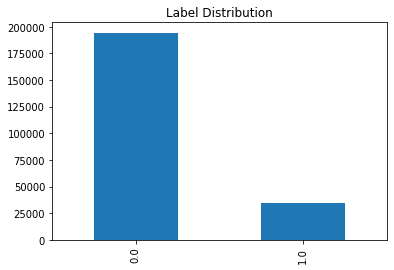

In [14]:
# plotting the label distribution
df['Diabetes_binary'].value_counts().plot(kind = 'bar', title = 'Label Distribution')

As you can see the dataset is imbalanced, we need to balance it in order to get a better model.


<AxesSubplot:title={'center':'Label Distribution after Oversampling'}>

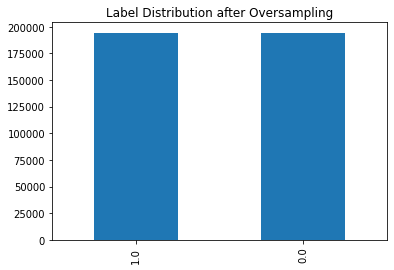

In [15]:
# over sampling of the dataset to get a balanced dataset
class_0 = df[df['Diabetes_binary'] == 0]
class_1 = df[df['Diabetes_binary'] == 1]

# over sampling of the minority class 1
class_1_over = class_1.sample(len(class_0), replace=True)

# Creating a new dataframe with over sampled class 1 df and class 0 df
df_new = pd.concat([class_1_over, class_0], axis=0)

# plotting the new label distribution
df_new['Diabetes_binary'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')

# Splitting dataset to train and test

In [16]:
X = df_new.drop('Diabetes_binary', axis = 1) # features
y = df_new[['Diabetes_binary']] # labels

# splitting the features and labels into train and test with test size = 20% and train size = 80%
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=10)

# Fitting machine learning models

**1. Random Forest Classifier**

In [17]:
# Initializing the model
model_1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',
                             min_samples_split=10, random_state=0)

# fitting the model on the train data
model_1.fit(X_train, y_train)

# predicting values on test data
predictions = model_1.predict(X_test)



In [18]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
73626,0.0,0.0
248421,1.0,1.0
99292,0.0,0.0
59038,0.0,0.0
79699,0.0,0.0
...,...,...
227119,0.0,0.0
62252,1.0,1.0
240340,1.0,1.0
90347,1.0,1.0


In [19]:
# Evaluation

# calculating the accuracy of the model
accuracies = {}
accuracy_1 = accuracy_score(y_test, predictions)
accuracies['Random Forest Classifier'] = accuracy_1

# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Random Forest Classifier : ' + str(round(accuracy_1*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)


Accuracy score of Random Forest Classifier : 90.45

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     38705
         1.0       0.86      0.96      0.91     39046

    accuracy                           0.90     77751
   macro avg       0.91      0.90      0.90     77751
weighted avg       0.91      0.90      0.90     77751


**************************************************


Confusion Matrix for Random Forest Classifier


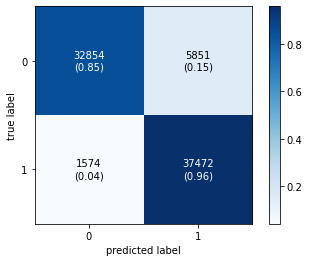

In [20]:
print('Confusion Matrix for Random Forest Classifier')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**2. Logistic Regression**

In [21]:
# Initializing the model
model_2 = LogisticRegression()

# fitting the model on the train data
model_2.fit(X_train, y_train)

# predicting values on test data
predictions = model_2.predict(X_test)


In [22]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
73626,0.0,0.0
248421,1.0,0.0
99292,0.0,0.0
59038,0.0,0.0
79699,0.0,0.0
...,...,...
227119,0.0,0.0
62252,1.0,1.0
240340,1.0,1.0
90347,1.0,1.0


In [23]:
# Evaluation

# calculating the accuracy of the model
accuracy_2 = accuracy_score(y_test, predictions)
accuracies['Logistic Regression'] = accuracy_2
# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Logistic Regression : ' + str(round(accuracy_2*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)


Accuracy score of Logistic Regression : 72.74

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72     38705
         1.0       0.72      0.75      0.73     39046

    accuracy                           0.73     77751
   macro avg       0.73      0.73      0.73     77751
weighted avg       0.73      0.73      0.73     77751


**************************************************


Confusion Matrix for Logistic Regression


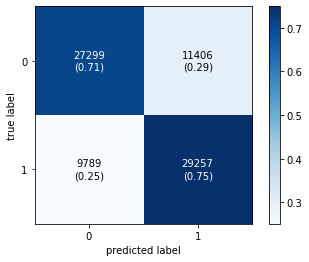

In [24]:
print('Confusion Matrix for Logistic Regression')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**3. Decision Tree Classifier**

In [25]:
# Initializing the model

model_3 = DecisionTreeClassifier(max_depth = 3)

# fitting the model on the train data
model_3.fit(X_train, y_train)

# predicting values on test data
predictions = model_3.predict(X_test)


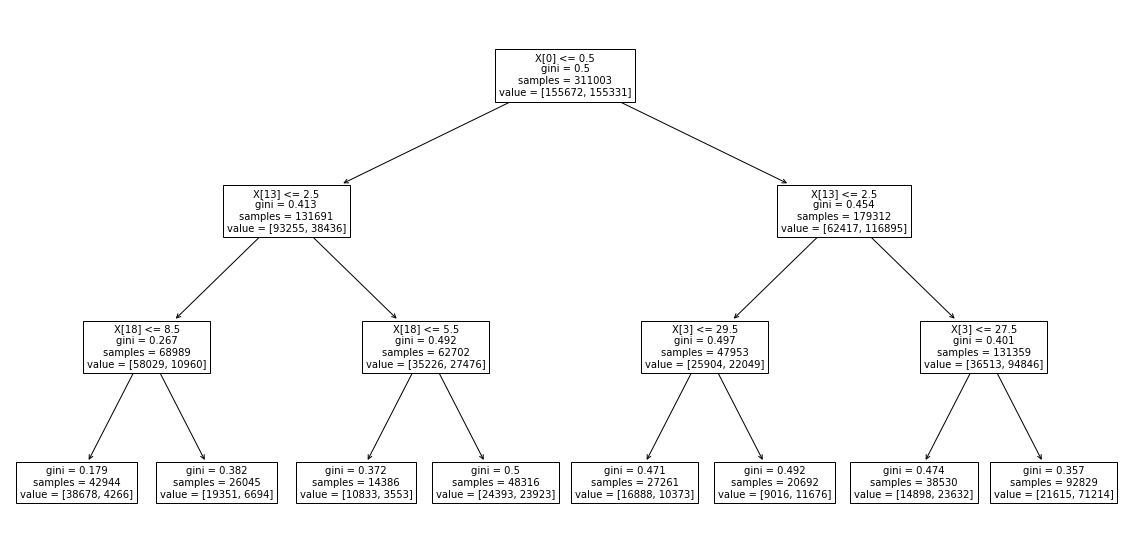

In [26]:
# plotting decision tree classifier
plt.figure(figsize = (20,10))
tree.plot_tree(model_3)
plt.show()

In [27]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
73626,0.0,0.0
248421,1.0,0.0
99292,0.0,0.0
59038,0.0,0.0
79699,0.0,0.0
...,...,...
227119,0.0,0.0
62252,1.0,1.0
240340,1.0,1.0
90347,1.0,1.0


In [28]:
# Evaluation

# calculating the accuracy of the model
accuracy_3 = accuracy_score(y_test, predictions)
accuracies['Decision Tree Classifier'] = accuracy_3

# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

# calculating the mse 
mse = mean_squared_error(y_test, predictions)

# calculating the rmse 
rmse = math.sqrt(mse)
print('\nAccuracy score of Decision Tree Classifier : ' + str(round(accuracy_3*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)


Accuracy score of Decision Tree Classifier : 69.83

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70     38705
         1.0       0.70      0.69      0.70     39046

    accuracy                           0.70     77751
   macro avg       0.70      0.70      0.70     77751
weighted avg       0.70      0.70      0.70     77751


**************************************************


Confusion Matrix for Decision Tree Classifier


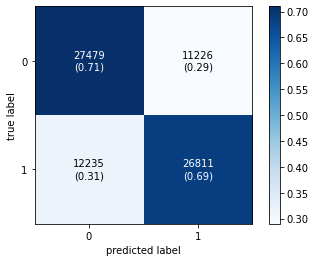

In [29]:
print('Confusion Matrix for Decision Tree Classifier')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**4. K – Nearest Neighbor (KNN)**

In [30]:
# Initializing the model

model_4 = KNeighborsClassifier(n_neighbors = 5, p = 2)

# fitting the model on the train data
model_4.fit(X_train, y_train)

# predicting values on test data
predictions = model_4.predict(X_test)

In [31]:
# Creating a new dataframe with true and predicted values
pred_df = pd.DataFrame()
pred_df['True values'] = y_test
pred_df['Predicted values'] = predictions
pred_df

,True values,Predicted values
73626,0.0,0.0
248421,1.0,1.0
99292,0.0,0.0
59038,0.0,1.0
79699,0.0,0.0
...,...,...
227119,0.0,0.0
62252,1.0,1.0
240340,1.0,1.0
90347,1.0,1.0


In [32]:
# Evaluation

# calculating the accuracy of the model
accuracy_4 = accuracy_score(y_test, predictions)
accuracies['KNeighborsClassifier'] = accuracy_4

# calculating the classification report 
classificationreport = classification_report(y_test, predictions) 

print('\nAccuracy score of K - Nearest Neighbors : ' + str(round(accuracy_4*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)
print("\n"+"*"*50)


Accuracy score of K - Nearest Neighbors : 81.87

**************************************************

Classification_report : 
              precision    recall  f1-score   support

         0.0       0.93      0.69      0.79     38705
         1.0       0.75      0.95      0.84     39046

    accuracy                           0.82     77751
   macro avg       0.84      0.82      0.82     77751
weighted avg       0.84      0.82      0.82     77751


**************************************************


Confusion Matrix for K - Nearest Neighbors


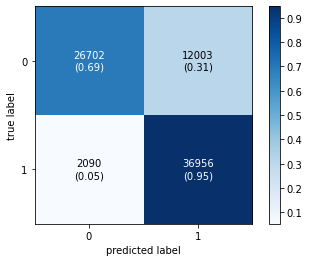

In [33]:
print('Confusion Matrix for K - Nearest Neighbors')

# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,predictions)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

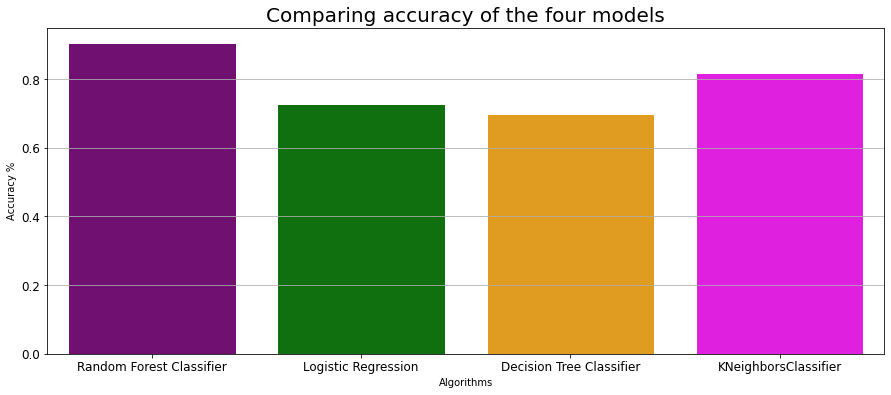

In [34]:
colors = ["purple", "green", "orange", "magenta"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Comparing accuracy of the four models', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


plt.show()

In [35]:
df_accuracy = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
df_accuracy.sort_values(by= ['Accuracy'], inplace= True, ascending= False)
df_accuracy

,Model,Accuracy
0,Random Forest Classifier,0.904503
3,KNeighborsClassifier,0.818742
1,Logistic Regression,0.727399
2,Decision Tree Classifier,0.698255


# Summary 
* Used oversampling method for imbalanced classification data.
* **Random Forest Classifier** models performs best fit for our dataset.

In [36]:
df.head(1)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0


In [47]:
k=[0,1,1,28,0,0,0,0,0,0,1,1,0,2,10,0,0,1,4,6,8]
userinput=k
result = model_1.predict([userinput])
print(result)
row_df = pd.DataFrame([pd.Series(k)])
row_df
prob = model_1.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

[0.]
The probability of you having Diabetes is 0.0567058681342737
